In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import re
import joblib
import string

In [4]:
fake = pd.read_csv('./Fake.csv')
real = pd.read_csv('./True.csv')

In [5]:
fake['label'] = 0
real['label'] = 1

In [4]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [5]:
real.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [6]:
data = pd.concat([fake,real],axis = 0)

In [7]:
data = data.drop(["title","subject","date"],axis = 1)

In [8]:
data.sample(10)

,text,label
9661,"WINSTON-SALEM, N.C. (Reuters) - Republican lea...",1
4878,WASHINGTON (Reuters) - President Donald Trump’...,1
15760,MOSCOW (Reuters) - Russia has carried out 18 b...,1
2862,"Holy f*ckballs, it hasn t even been a week sin...",0
7286,Every parent s worst fear is that a teacher wi...,0
11221,"CHARLESTON, S.C./WASHINGTON (Reuters) - Republ...",1
9770,WASHINGTON (Reuters) - Democratic presidential...,1
13615,"Trump was 100% correct when he said, Hillary ...",0
4099,Donald Trump has dragged the Republican Party ...,0
19855,MOSCOW (Reuters) - Russia s Foreign Ministry s...,1


In [9]:
data.describe()

,label
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]',"",text)
    text = re.sub("\\W"," ", text)
    text = re.sub("https?:://\S+/www\.\S+","", text)
    text = re.sub("<.*?>+","",text)
    text = re.sub("[%s]" % re.escape(string.punctuation),"",text)
    text = re.sub("\n","", text)
    text = re.sub("\w*\d\w*","",text)
    return text

In [10]:
data["text"] = data["text"].apply(clean_text)

In [11]:
x = data["text"]
y = data["label"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.25, random_state = 42)

In [12]:
vectorizer = TfidfVectorizer()
xv_train = vectorizer.fit_transform(xtrain)
xv_test = vectorizer.transform(xtest)

In [13]:
lr = LogisticRegression()
lr.fit(xv_train, ytrain)

LogisticRegression()

In [14]:
prediction = lr.predict(xv_test)
lr.score(xv_test, ytest)

0.9858351893095768

In [15]:
print(classification_report(ytest, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5895
           1       0.98      0.99      0.99      5330

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [16]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel='linear')
}

In [17]:
model_accuracies = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(xv_train, ytrain)
    y_pred = model.predict(xv_test)
    accuracy = accuracy_score(ytest, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(ytest, y_pred))


Training Naive Bayes...
Naive Bayes Accuracy: 0.9346
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5895
           1       0.94      0.92      0.93      5330

    accuracy                           0.93     11225
   macro avg       0.94      0.93      0.93     11225
weighted avg       0.93      0.93      0.93     11225


Training Logistic Regression...
Logistic Regression Accuracy: 0.9858
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5895
           1       0.98      0.99      0.99      5330

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225


Training Random Forest...
Random Forest Accuracy: 0.9883
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5895
           1       0.99      0.98      0.99      5330



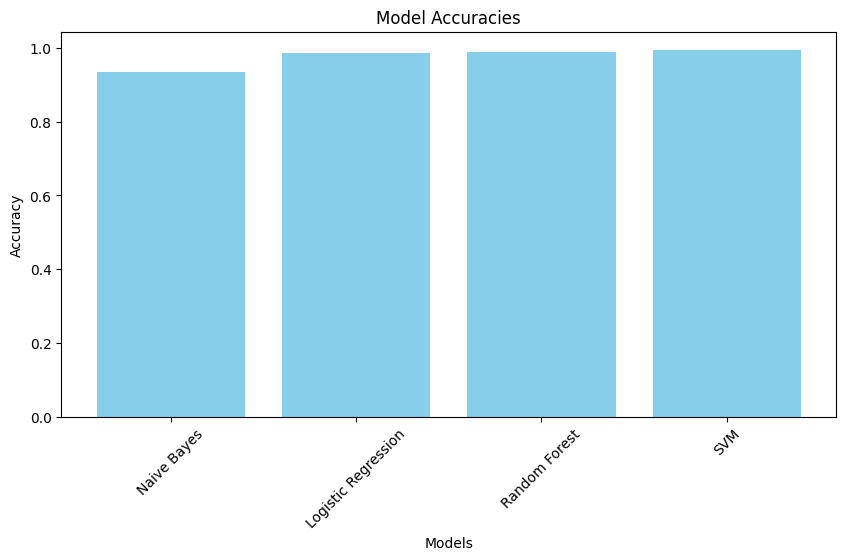

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.xticks(rotation=45)
plt.show()